In [68]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)

# Combine the data into a single dataset

combined_data_df = pd.merge(city_data_df, ride_data_df,
                                 how='outer', on='city')

# Display the data table for preview
combined_data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

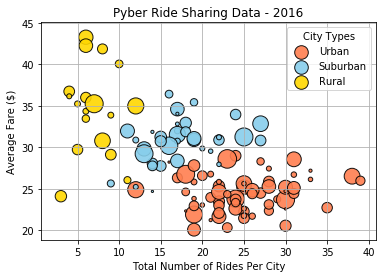

In [77]:
#Average Fare Per City
average_fare = combined_data_df.groupby("city")["fare"].mean()
average_fare = pd.DataFrame(average_fare).reset_index()
average_fare = average_fare.rename(columns = {'fare': 'avg_fare'})
#Total Number of Rides Per City
total_rides = combined_data_df.groupby("city")["ride_id"].count()
total_rides = pd.DataFrame(total_rides).reset_index()
total_rides = total_rides.rename(columns = {'ride_id': 'total_rides'})
#Total Drivers
total_drivers = combined_data_df[["city", "driver_count"]].drop_duplicates("city")
#City Type
city_type = combined_data_df[["city", "type"]].drop_duplicates("city")
final_df = pd.merge(pd.merge(pd.merge(average_fare, total_rides, on="city"), 
                             total_drivers, on="city"), city_type, on="city")


urban_group = final_df.loc[final_df['type'] == 'Urban']
suburban_group = final_df.loc[final_df['type'] == 'Suburban']
rural_group = final_df.loc[final_df['type'] == 'Rural']
# Obtain the x and y coordinates for each of the three city types
# Build the scatter plots for each city types
# Incorporate the other graph properties
# Create a legend
# Incorporate a text label regarding circle size
ax1 = urban_group.plot(kind='scatter',x='total_rides', y='avg_fare',
                       color='coral', s=final_df['driver_count']*5, label = 'Urban', 
                       alpha = 0.9, edgecolor = "black", linewidths = 1)    
ax2 = suburban_group.plot(kind='scatter', x='total_rides', y='avg_fare', 
                          color='skyblue',s=final_df['driver_count']*5, label = 'Suburban', 
                          alpha = 0.9, edgecolor = "black", linewidths = 1, ax=ax1)    
ax3 = rural_group.plot(kind='scatter', x='total_rides', y='avg_fare', 
                       color='gold', s=final_df['driver_count']*5, label = 'Rural', 
                       alpha = 0.9, edgecolor = "black", linewidths = 1, ax=ax1)
# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size
plt.title("Pyber Ride Sharing Data - 2016")
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare ($)")
plt.legend(title = 'City Types')
plt.grid(True)

# Save Figure
plt.show()

In [70]:
# Show plot
plt.show()

## Total Fares by City Type

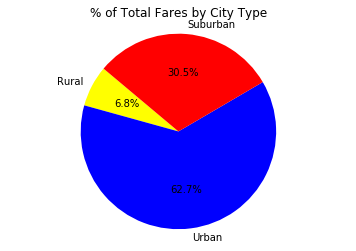

In [71]:
# Calculate Type Percents
rural = combined_data_df.loc[combined_data_df['type'] == "Rural", 'fare'].sum()
rural_sum = rural

urban = combined_data_df.loc[combined_data_df['type'] == "Urban", 'fare'].sum()
urban_sum = urban

suburban = combined_data_df.loc[combined_data_df['type'] == "Suburban", 'fare'].sum()
suburban_sum = suburban

total_sum = rural_sum + urban_sum + suburban_sum

rural_persum = (rural_sum / total_sum) * 100
urban_persum = (urban_sum / total_sum) * 100
suburban_persum = (suburban_sum / total_sum) * 100

Type = ["Rural", "Urban", "Suburban"]
Type_sum = [rural_sum, urban_sum, suburban_sum]
colors = ["yellow","blue","red"]
# Build Pie Chart

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(Type_sum, labels=Type, colors=colors,
        autopct="%1.1f%%", startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("../Fares_by_City_Type.png")




In [72]:
# Show Figure
plt.show()

## Total Rides by City Type

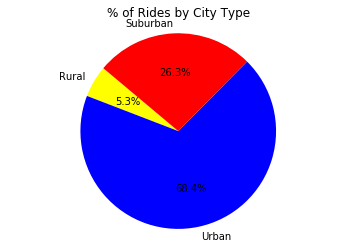

In [73]:
# Calculate Type Percents
rural2 = combined_data_df.loc[combined_data_df['type'] == "Rural", :]
rural_count = len(rural2)

urban2 = combined_data_df.loc[combined_data_df['type'] == "Urban", :]
urban_count = len(urban2)

suburban2 = combined_data_df.loc[combined_data_df['type'] == "Suburban", :]
suburban_count = len(suburban2)

total_count = rural_count + urban_count + suburban_count

rural_per = (rural_count / total_count) * 100
urban_per = (urban_count / total_count) * 100
suburban_per = (suburban_count / total_count) * 100

Type = ["Rural", "Urban", "Suburban"]
Type_Count = [rural_count, urban_count, suburban_count]
colors = ["yellow","blue","red"]
# Build Pie Chart

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(Type_Count, labels=Type, colors=colors,
        autopct="%1.1f%%", startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.title("% of Rides by City Type")
# Save Figure
plt.savefig("../Rides_by_City_Type.png")



In [74]:
# Show Figure
plt.show()

## Total Drivers by City Type

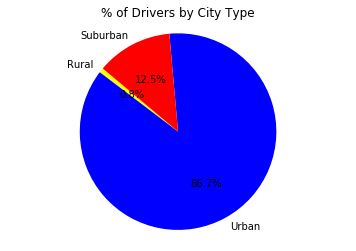

In [75]:
# Calculate Type Percents
rural3 = combined_data_df.loc[combined_data_df['type'] == "Rural", 'driver_count'].sum()
rural_driver_sum = rural3

urban3 = combined_data_df.loc[combined_data_df['type'] == "Urban", 'driver_count'].sum()
urban_driver_sum = urban3

suburban3 = combined_data_df.loc[combined_data_df['type'] == "Suburban", 'driver_count'].sum()
suburban_driver_sum = suburban3

total_driver_sum = rural_driver_sum + urban_driver_sum + suburban_driver_sum

rural_persum = (rural_driver_sum / total_driver_sum) * 100
urban_persum = (urban_driver_sum / total_driver_sum) * 100
suburban_persum = (suburban_driver_sum / total_driver_sum) * 100

Type = ["Rural", "Urban", "Suburban"]
Type_driver_sum = [rural_driver_sum, urban_driver_sum, suburban_driver_sum]
colors = ["yellow","blue","red"]
# Build Pie Chart

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(Type_driver_sum, labels=Type, colors=colors,
        autopct="%1.1f%%", startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.title("% of Drivers by City Type")
# Save Figure
plt.savefig("../Drivers_by_City_Type.png")





In [76]:
# Show Figure
plt.show()